# Part A: Data Preprocessing and Imputation

In [1]:
# import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Load and Prepare the data

In [2]:
# Load the dataset
df = pd.read_csv("UCI_Credit_Card.csv")
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
# Check for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

> No null/missing values found in any of the columns

In [4]:
# Check the first few rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Remove ID column & Process the values in EDUCATION column


In [5]:
# Remove ID column since it's not relevant for prediction
df.drop('ID', axis=1, inplace=True)

# Change EDUCATION column having values 0,5 and 6 to 5
df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6), 'EDUCATION'] = 5

# Print the distribution of data in EDUCATION column
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      345
4      123
Name: count, dtype: int64

#### Plot data distribution within Categorical columns

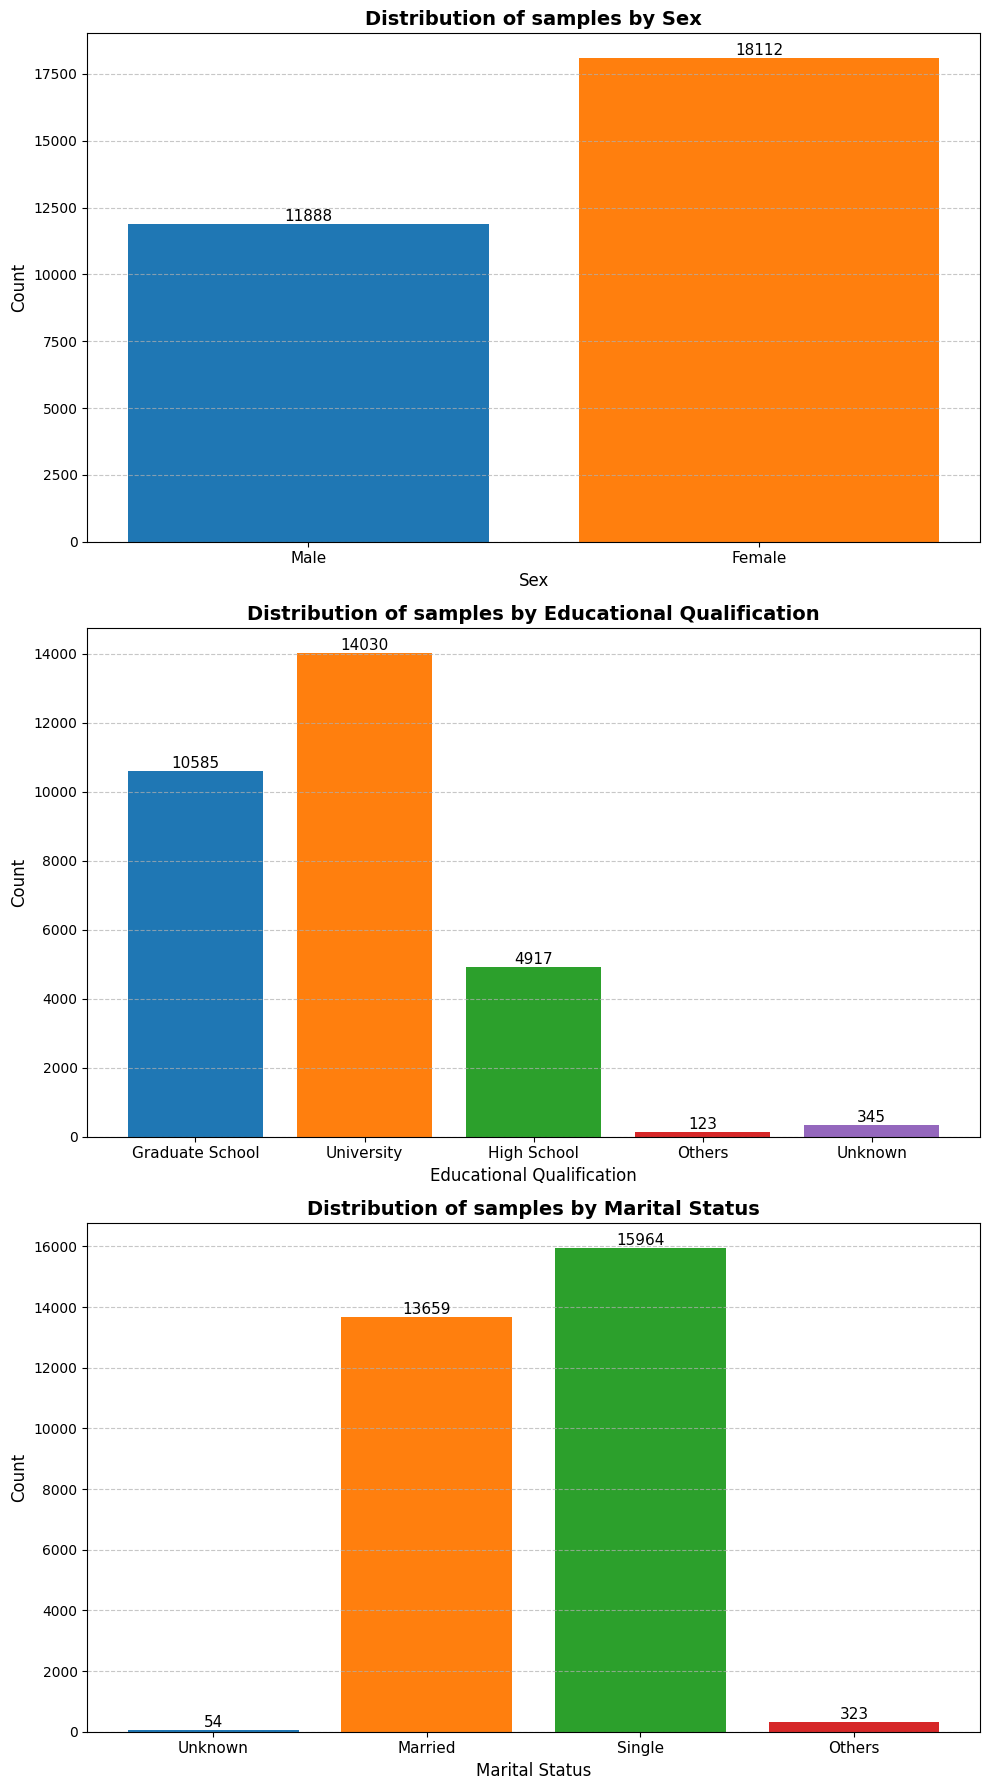

In [6]:
warnings.filterwarnings("ignore")

# Define mapping dictionaries for labels
sex_labels = {1: 'Male', 2: 'Female'}
education_labels = {
    1: 'Graduate School', 2: 'University', 3: 'High School',
    4: 'Others', 5: 'Unknown', 6: 'Unknown'
}
marriage_labels = {1: 'Married', 2: 'Single', 3: 'Others'}

# Prepare data for plotting
columns = {
    'SEX': sex_labels,
    'EDUCATION': education_labels,
    'MARRIAGE': marriage_labels
}

cmap = plt.get_cmap('tab10')  # You can choose any colormap

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

for ax, (col, labels) in zip(axes, columns.items()):
    counts = df[col].value_counts().sort_index()
    categories = [labels.get(cat, 'Unknown') for cat in counts.index]
    colors = [cmap(i) for i in range(len(categories))]

    bars = ax.bar(categories, counts.values, color=colors)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks(range(len(categories)))  # Fix: set x-tick positions
    ax.set_xticklabels(categories, fontsize=11)

    for bar in bars:
        ax.annotate(f"{int(bar.get_height()):d}",
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=11)

axes[0].set_title('Distribution of samples by Sex', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex', fontsize=12)
axes[1].set_title('Distribution of samples by Educational Qualification', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Educational Qualification', fontsize=12)
axes[2].set_title('Distribution of samples by Marital Status', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Marital Status', fontsize=12)

plt.tight_layout()
plt.show()

#### Analyze class imbalance

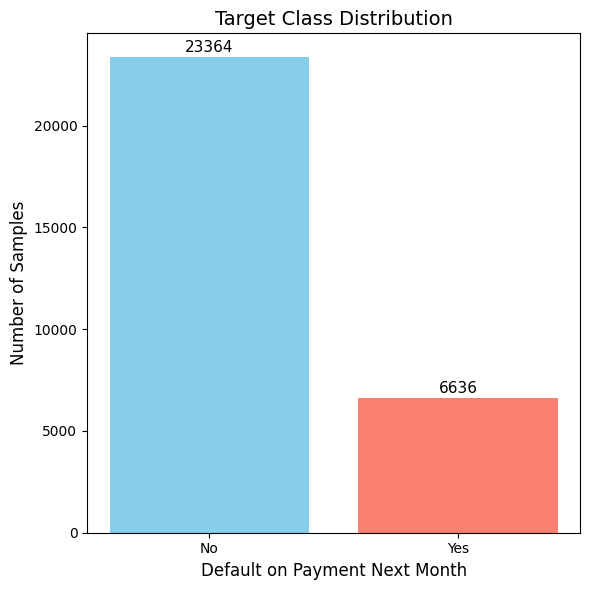

In [7]:
# Count the frequency of each class label
class_counts = df['default.payment.next.month'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Default on Payment Next Month', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Target Class Distribution', fontsize=14)

# Replace 0 and 1 with 'No' and 'Yes'
plt.xticks([0, 1], ['No', 'Yes'])

# Add count labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

> The plot shows a strong class imbalance in the UCI credit card dataset: the majority class (“No Default Next Month”) has **23,364** samples (**3.5 times** the minority class), while the minority class (“Default Next Month”) has only **6,636** samples. 

> However, since the minority class is over 10% of the entire dataset, no special measure is required to mitigate the class imbalance issue.

#### Analyze correlation between features columns and target column

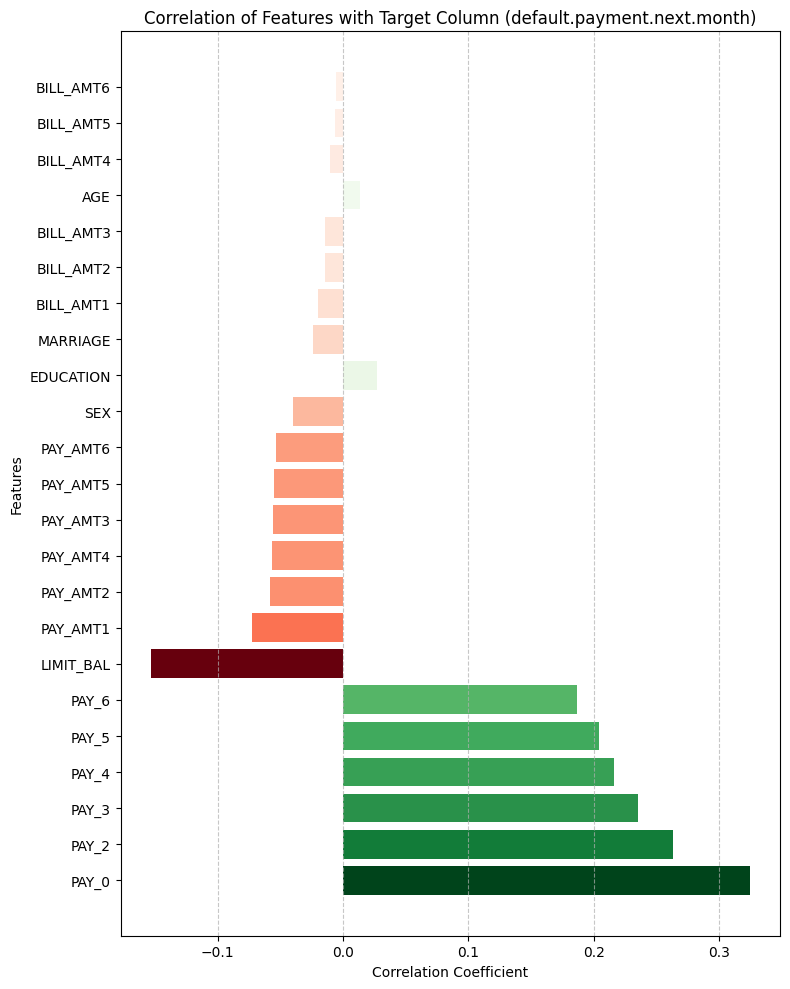

In [8]:
# Exclude target column itself when calculating correlations
correlations = df.corr()[['default.payment.next.month']].drop('default.payment.next.month')

# Sort correlations by absolute value descending
correlations_sorted = correlations.reindex(correlations['default.payment.next.month'].abs().sort_values(ascending=False).index)

# Normalize scales for coloring positive and negative separately
pos_vals = correlations_sorted['default.payment.next.month'].clip(lower=0)
neg_vals = (-correlations_sorted['default.payment.next.month']).clip(lower=0)

# Normalize positive and negative values to [0,1]
pos_norm = plt.Normalize(0, pos_vals.max() if pos_vals.max() > 0 else 1)
neg_norm = plt.Normalize(0, neg_vals.max() if neg_vals.max() > 0 else 1)

# Create green colors for positive correlations and red colors for negative correlations
colors = []
for val in correlations_sorted['default.payment.next.month']:
    if val >= 0:
        colors.append(plt.cm.Greens(pos_norm(val)))
    else:
        colors.append(plt.cm.Reds(neg_norm(-val)))

plt.figure(figsize=(8, 10))
bars = plt.barh(correlations_sorted.index, correlations_sorted['default.payment.next.month'], color=colors)
plt.title('Correlation of Features with Target Column (default.payment.next.month)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Key observations from the correlation plot of features with the target (`default.payment.next.month`) in the UCI credit card dataset:
- The `PAY_X` features (such as PAY_0, PAY_2, PAY_3) show the **strongest positive correlation** with default status, indicating that recent payment status is highly predictive of customer default behavior.

- `LIMIT_BAL` (credit limit) has a **moderate negative correlation** with default status, suggesting that customers with higher credit limits are less likely to default.

- **Most** bill amount (`BILL_AMT`), demographic (AGE, SEX, EDUCATION, MARRIAGE), and payment amount (`PAY_AMT`) features show **weak or negligible correlation** with the default outcome.

- **No single feature** shows **very strong correlation**, highlighting that predicting default likely requires combining multiple features in a model.

#### Analyze importance of features using Lasso coefficients

We will use Lasso regression to analyze the importance of features in determining the target variable. 

Lasso regression is a linear regression model that uses L1 regularization to shrink the coefficients of less important features to zero, effectively removing them from the model.

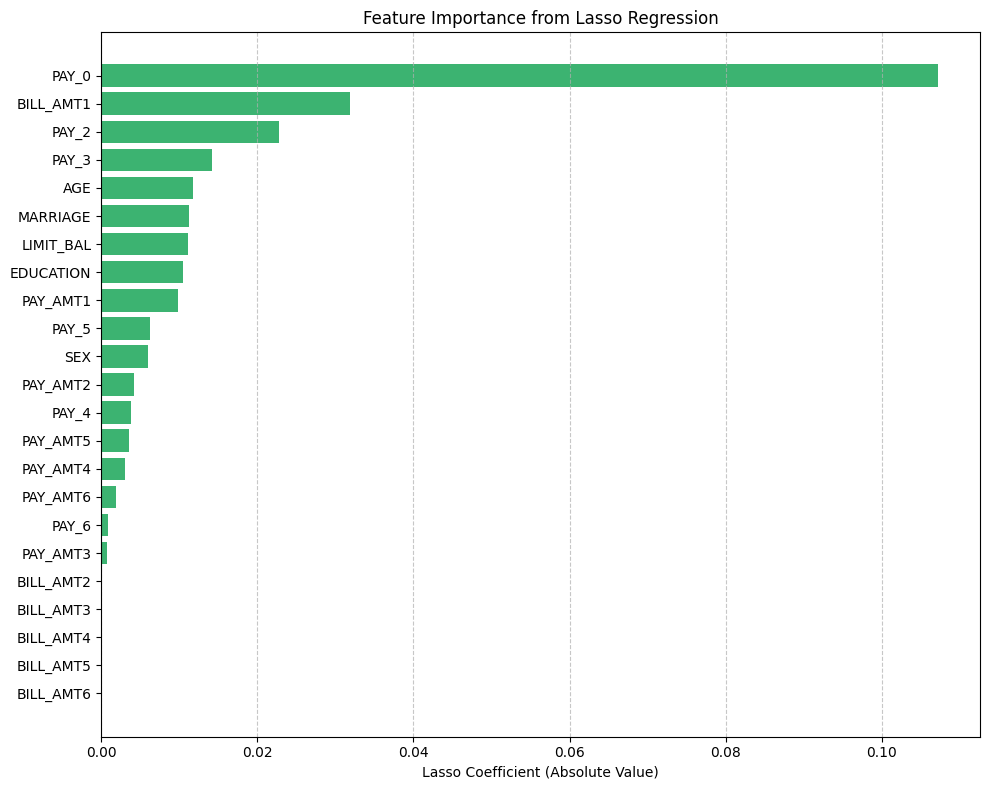

In [9]:
# Prepare feature matrix X and target y
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso regression with cross-validation to choose alpha
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
coef = lasso.coef_

# Get absolute coefficients and corresponding features
feature_importance = pd.Series(np.abs(coef), index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance.index, feature_importance.values, color='mediumseagreen')
plt.xlabel('Lasso Coefficient (Absolute Value)')
plt.title('Feature Importance from Lasso Regression')
plt.gca().invert_yaxis()  # Most important at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observations

- PAY_0 is by far the most significant predictor of default, with a much higher coefficient than any other feature.

- Other payment status and billing features like BILL_AMT1, PAY_2, and PAY_3 also have moderate importance.

- Demographic factors (AGE, MARRIAGE, EDUCATION, SEX) and limit balance (LIMIT_BAL) contribute, but are less influential.

- Many bill amount and payment amount features (BILL_AMT 2-6, PAY_AMT 3-6) show very low or zero importance, indicating Lasso considers them less relevant for predicting default.

- Overall, **repayment status** and **recent financial behavior** are most critical for identifying default risk in this dataset.

#### Select feature columns to introduce missing values
- We will select `PAY_0`, `LIMIT_BAL` and `PAY_2` columns to introduce missing values.

- The reason for selecting these columns is that they exhibit high correlation (plot above) and high feature importance (plot above) with respect to the target variable.

In [10]:
# Create a copy
df_copy = df.copy()

# Define fraction of missing values
frac_missing = 0.1

# Get total number of rows
n = len(df_copy)

# Randomly select indices for missing PAY_0 values
missing_pay_0_indices = np.random.choice(df_copy.index, size=int(frac_missing * n), replace=False)
df_copy.loc[missing_pay_0_indices, 'PAY_0'] = np.nan

# Randomly select indices for missing LIMIT_BAL values
missing_limit_indices = np.random.choice(df_copy.index, size=int(frac_missing * n), replace=False)
df_copy.loc[missing_limit_indices, 'LIMIT_BAL'] = np.nan

# Randomly select indices for missing PAY_2 values
missing_pay_2_indices = np.random.choice(df_copy.index, size=int(frac_missing * n), replace=False)
df_copy.loc[missing_pay_2_indices, 'PAY_2'] = np.nan

In [12]:
# Check for missing values in dfA
df_copy.isnull().sum()

LIMIT_BAL                     3000
SEX                              0
EDUCATION                        0
MARRIAGE                         0
AGE                              0
PAY_0                         3000
PAY_2                         3000
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default.payment.next.month       0
dtype: int64

We have introduced missing values equivalent to 10% of the overall sample size in each of the columns `PAY_0`, `LIMIT_BAL` and `PAY_2` of the dataset.

### Imputation Strategy-1: Simple Imputation (Baseline)

Fill the missing values with the median of that column and copy the data to new dataframe dfA

In [13]:
# copy first
dfA = df_copy.copy()

# fill missing values with median
dfA['PAY_0'] = dfA['PAY_0'].fillna(dfA['PAY_0'].median())
dfA['LIMIT_BAL'] = dfA['LIMIT_BAL'].fillna(dfA['LIMIT_BAL'].median())
dfA['PAY_2'] = dfA['PAY_2'].fillna(dfA['PAY_2'].median())

In [14]:
# Check for missing values in dfA
print(dfA.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using median imputation

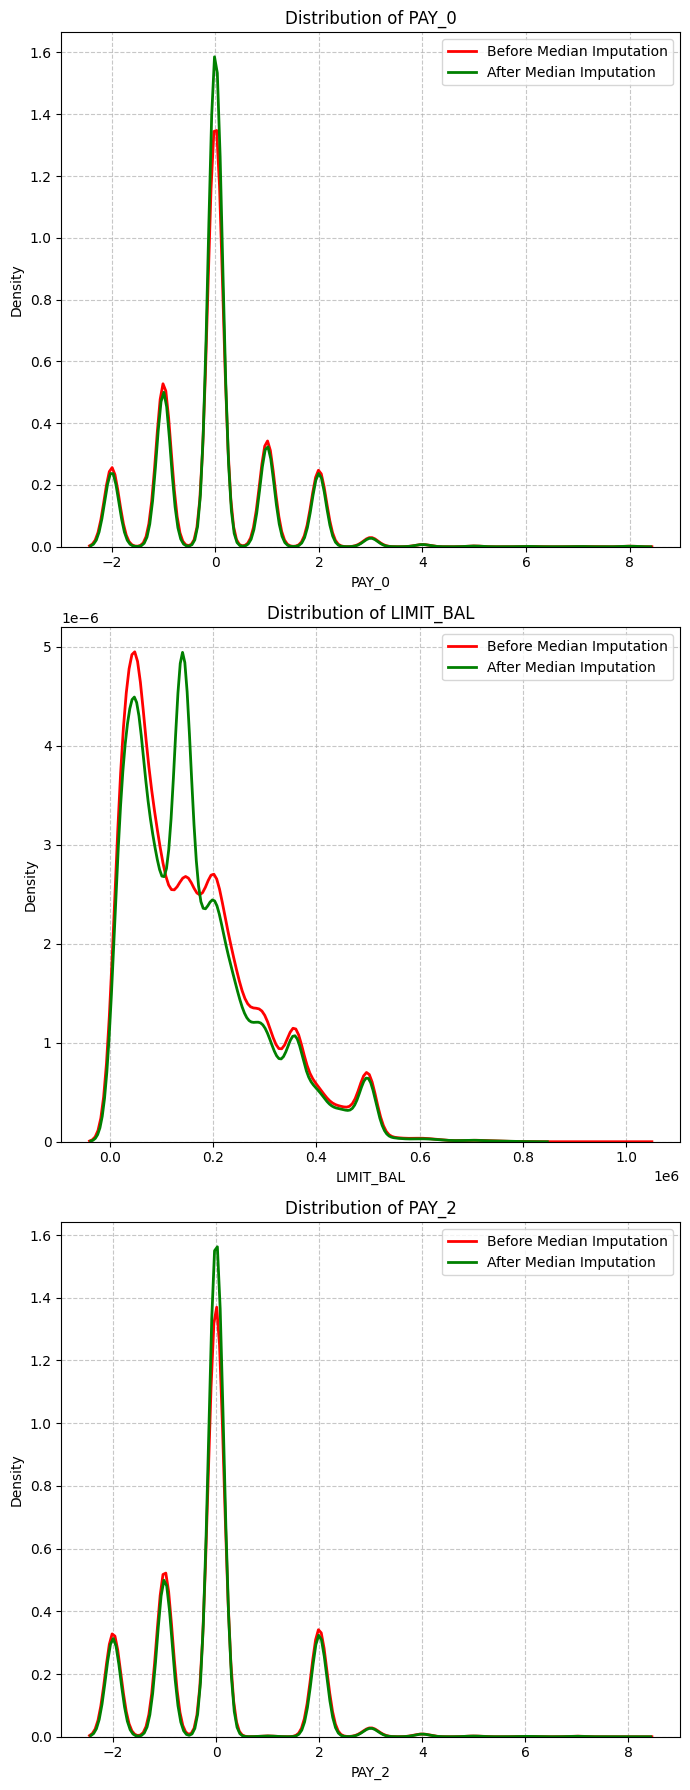

In [31]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 18))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Before Median Imputation', color='red', linewidth=2)
    sns.kdeplot(dfA[feature], label='After Median Imputation', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Observation:
- The distributions of `PAY_0`, `LIMIT_BAL`, and `PAY_2` before (red) and after (green) imputation are similar, showing strong overlap.

- Both `PAY_0` and `PAY_2` maintain distinct peaks at the same values, indicating categorical or ordinal behavior preserved through imputation. However, the peaks around median are slightly taller post imputation.

- `LIMIT_BAL` (originally unimodal) becomes multimodal after imputation, a new peak (mode value) is observed at around 160000.

#### Why median imputation is favoured over mean imputation?

Median imputation is favored because it handles outliers and skewness better, giving more robust and accurate results for missing numerical data.

**Median imputation is more robust to outliers than mean imputation**
- It better represents central tendency in skewed distributions.
- Median preserves the data distribution shape better than mean.
- Mean is suitable only for normally distributed data without extreme outliers.
- Median provides a more reliable and realistic substitute for missing values when data is skewed.
- Both methods ignore relationships among variables and may underestimate variability, but median generally yields more meaningful imputations.

### Imputation Strategy-2: Linear Regression Imputation

Create a second clean dataset copy

In [32]:
dfB = df_copy.copy()

In [33]:
# check for sum of all missing/null values
print(dfB.isnull().sum().sum())

9000


#### Methodology

- For missing values in `LIMIT_BAL` & `PAY_2` column, use median imputation (same as in Strategy-1).

- For missing values in `PAY_0` column, use Linear Regression model to predict the missing values.

- Use all other non-missing features except `default.payment.next.month` as predictors variables for training the linear regression model.

In [34]:
# Fill LIMIT_BAL & PAY_2 missing values with median
dfB['LIMIT_BAL'].fillna(dfB['LIMIT_BAL'].median(), inplace=True)
dfB['PAY_2'].fillna(dfB['PAY_2'].median(), inplace=True)

# determine predictor columns to predict missing values in PAY_0
predictors = dfB.columns.difference(['PAY_0','PAY_2','LIMIT_BAL','default.payment.next.month'])

# Split data with PAY_0 known and unknown
train = dfB[dfB['PAY_0'].notnull()]
test = dfB[dfB['PAY_0'].isnull()]

X_train = train[predictors]
y_train = train['PAY_0']
X_test = test[predictors]

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing PAY_0 values
predicted_pay_0 = model.predict(X_test)

# Round to nearest integer
predicted_pay_0_rounded = np.round(predicted_pay_0)

# Apply bounds: less than -1 becomes -1, greater than 9 becomes 9
predicted_pay_0_clipped = np.clip(predicted_pay_0_rounded, -1, 9)

# Fill missing PAY_0 values
dfB.loc[dfB['PAY_0'].isnull(), 'PAY_0'] = predicted_pay_0_clipped

In [35]:
# check for sum of all missing/null values
print(dfB.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using linear regression

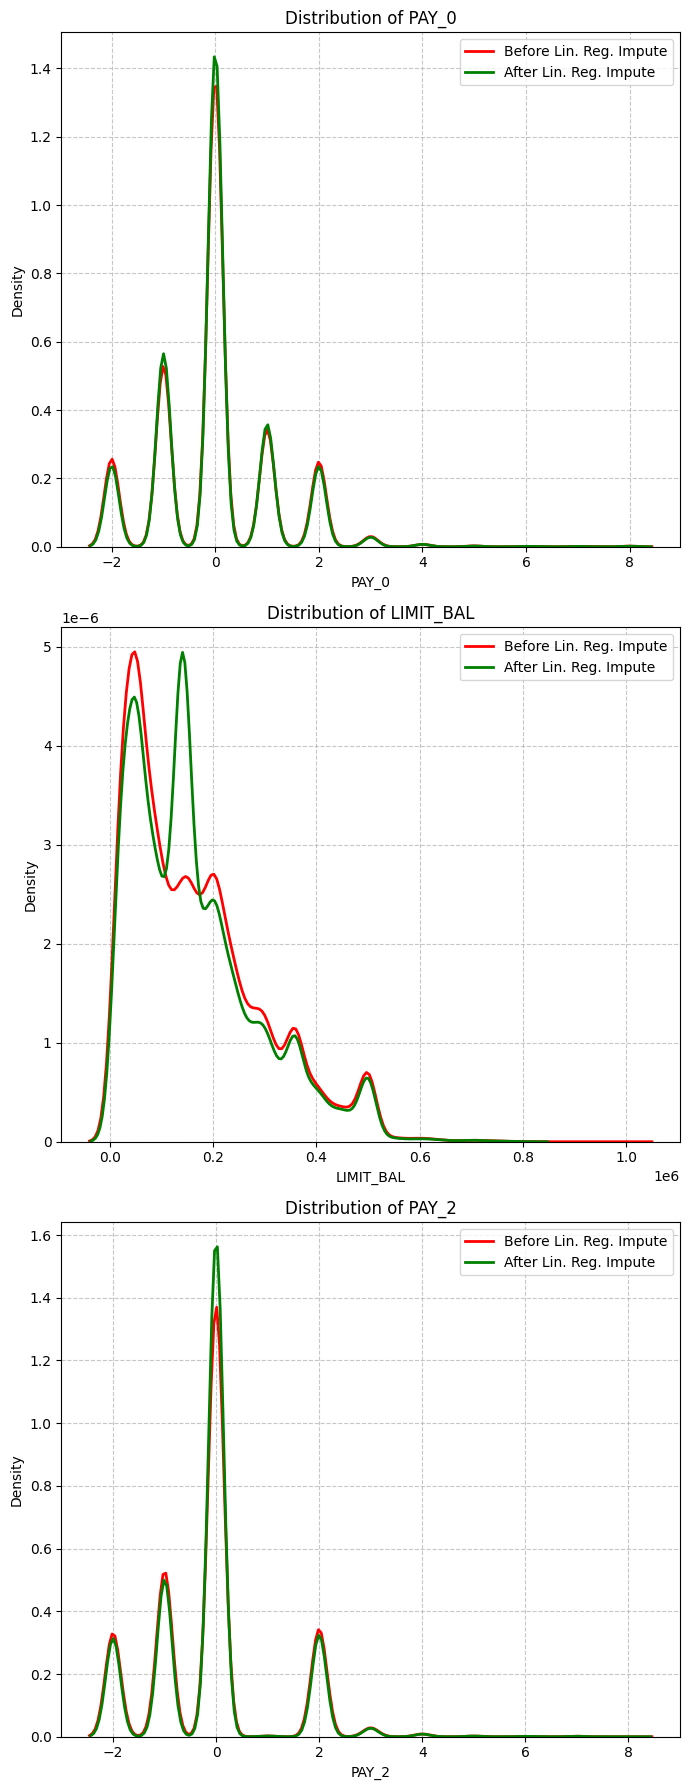

In [36]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 18))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Before Lin. Reg. Impute', color='red', linewidth=2)
    sns.kdeplot(dfB[feature], label='After Lin. Reg. Impute', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Observation from Plot:** no significant difference in the distributions is observed when compared to distributions of median imputation.

#### Key underlying assumption of MAR

The **key underlying assumption** made while imputing missing ‘AGE’ values using linear regression with all other columns as predictors is: **Missing at Random (MAR)**

We assumed the missingness in the ‘AGE’ column is dependent only on the observed values in other columns, not on the missing values themselves. In other words, given the other observed predictor variables, the fact that the ‘AGE’ value is missing does not depend on the unseen ‘AGE’ value.

**Other assumptions include:**
- Linearity: The relationship between ‘AGE’ and the predictors is linear, as linear regression fits a linear model.
- No perfect multicollinearity: Predictor variables are not perfectly correlated.
- Homoscedasticity: The variance of residuals is constant across the predictors.
- Correct model specification: The chosen predictors include the relevant variables for accurately predicting ‘AGE’.

This **MAR assumption** is crucial in regression imputation methods to avoid biased imputations and ensure validity of the model predictions for missing values.

### Imputation Strategy-3: Non-Linear Regression Imputation

Create a third clean dataset copy (Dataset C)

In [38]:
dfC = df_copy.copy()

In [39]:
# check for sum of all missing/null values
print(dfC.isnull().sum().sum())

9000


#### Methodology

- For missing values in `LIMIT_BAL` & `PAY_2` column, use median imputation (same as in Strategy-1).

- For missing values in `PAY_0` column, use Decision Tree Regression model to predict the missing values.

- Use all other non-missing features except `default.payment.next.month` as predictors variables for training the Decision Tree Regression model.

In [40]:
# Fill LIMIT_BAL & PAY_2 missing values with median
dfC['LIMIT_BAL'].fillna(dfC['LIMIT_BAL'].median(), inplace=True)
dfC['PAY_2'].fillna(dfC['PAY_2'].median(), inplace=True)

# determine predictor columns to predict missing values in PAY_0
predictors = dfC.columns.difference(['PAY_0','PAY_2','LIMIT_BAL','default.payment.next.month'])

# Split data by availability of PAY_0
train = dfC[dfC['PAY_0'].notnull()]
test = dfC[dfC['PAY_0'].isnull()]

X_train = train[predictors]
y_train = train['PAY_0']
X_test = test[predictors]

# Fit Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict missing PAY_0 values
predicted_pay_0 = model.predict(X_test)

# Round to nearest integer
predicted_pay_0_rounded = np.round(predicted_pay_0)

# Apply bounds: less than -1 becomes -1, greater than 9 becomes 9
predicted_pay_0_clipped = np.clip(predicted_pay_0_rounded, -1, 9)

# Fill missing PAY_0 values
dfC.loc[dfC['PAY_0'].isnull(), 'PAY_0'] = predicted_pay_0_clipped

In [41]:
# check for sum of all missing/null values
print(dfC.isnull().sum().sum())

0


#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after data imputation using Decision Tree regression

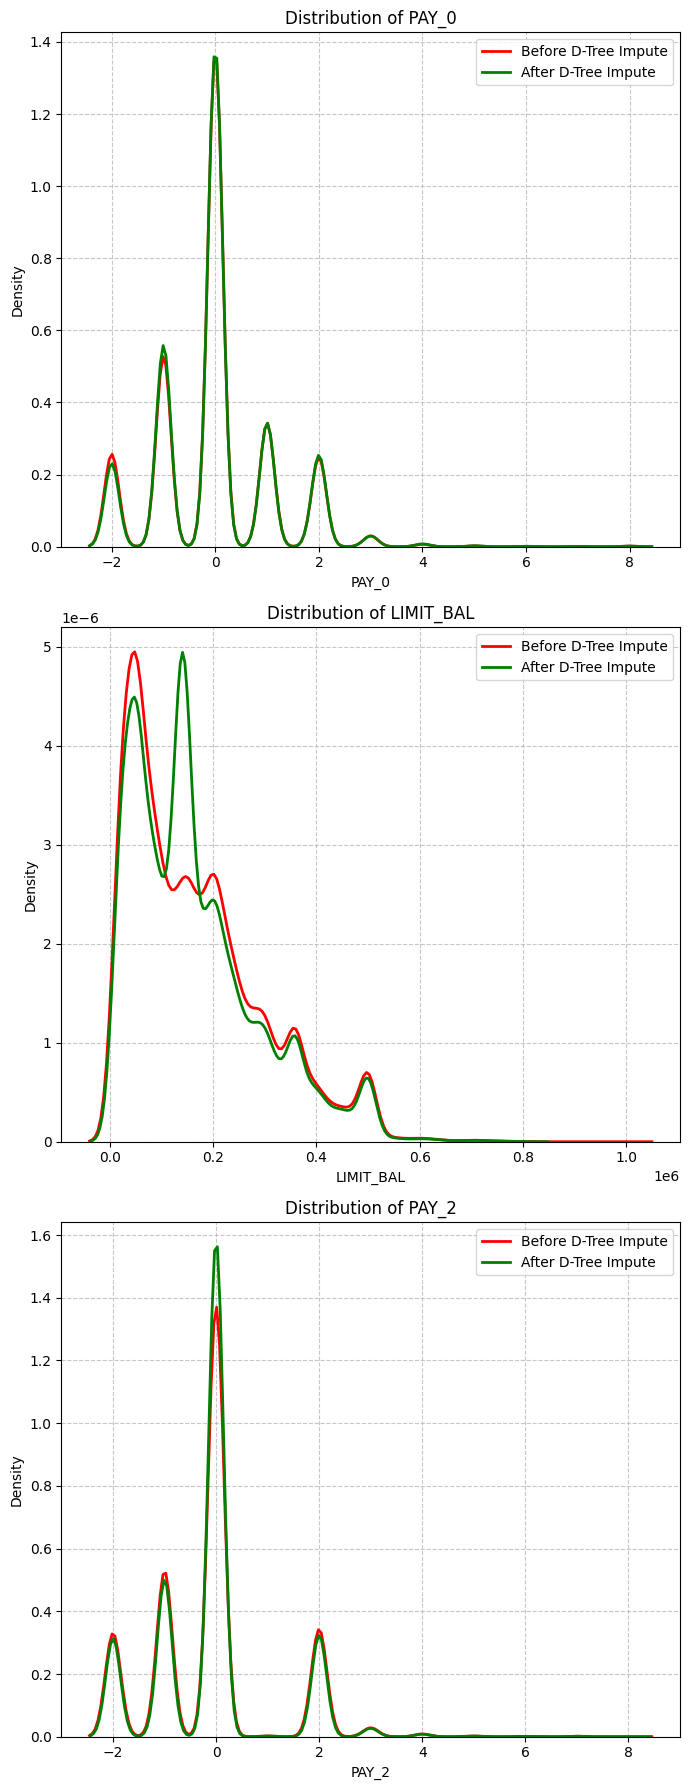

In [42]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 18))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Before D-Tree Impute', color='red', linewidth=2)
    sns.kdeplot(dfC[feature], label='After D-Tree Impute', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Observation from Plot:** no significant difference in the distributions is observed when compared to distributions of median imputation and decision tree imputation.

# Part B: Model Training and Performance Assessment

### Data Split

Create a 4th dataset (Dataset D) by removing all rows from the original dataset that contain any missing values

In [44]:
dfD = df_copy.dropna()

#### Visualize column data with KDE plot

Visualize the distribution of data in columns `PAY_0`, `LIMIT_BAL`, `PAY_2` before and after removing columns with missing values

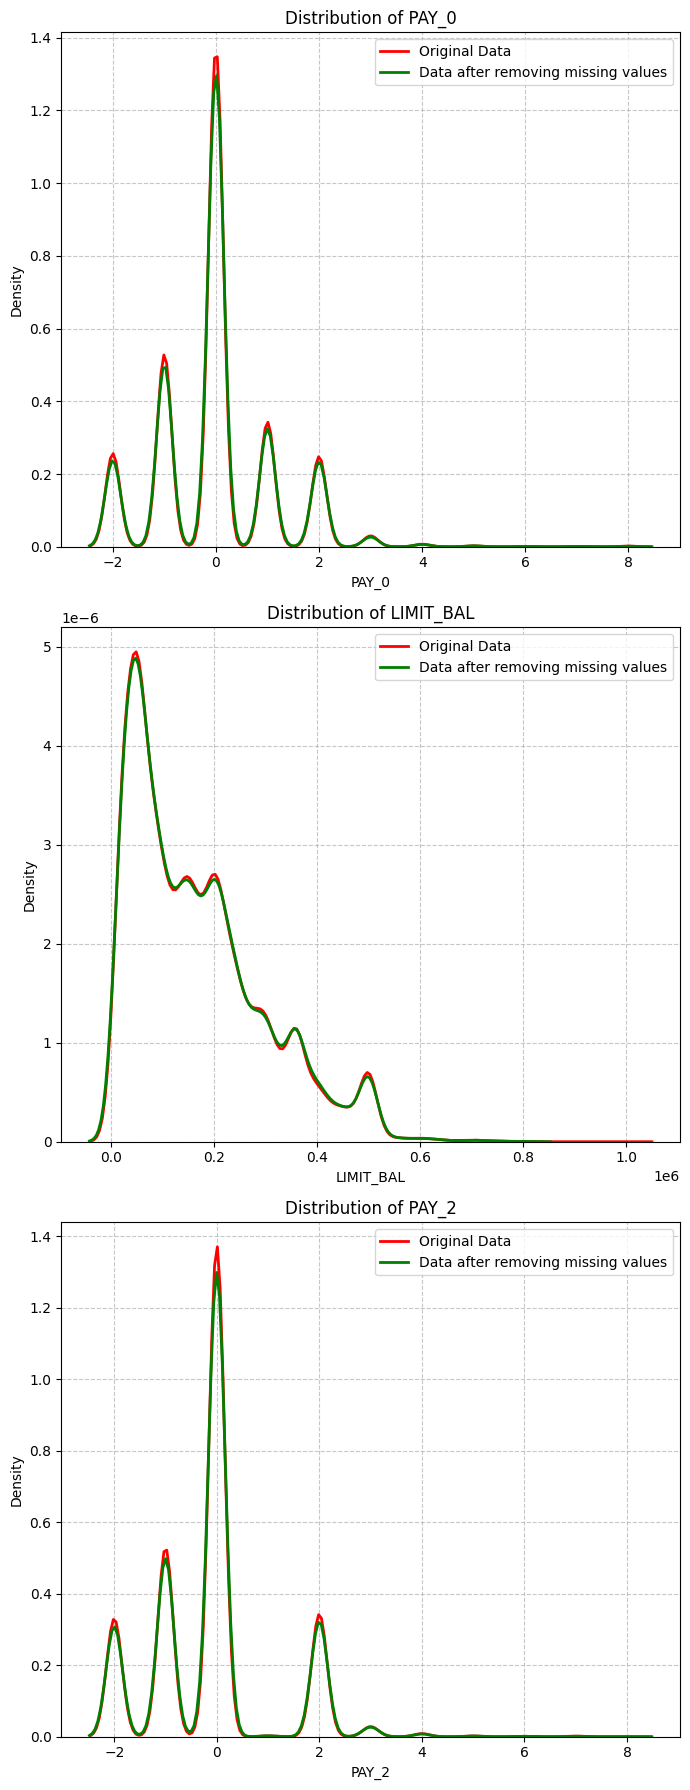

In [46]:
features = ['PAY_0', 'LIMIT_BAL', 'PAY_2']

plt.figure(figsize=(7, 18))
for idx, feature in enumerate(features):
    plt.subplot(3, 1, idx+1)
    sns.kdeplot(df[feature], label='Original Data', color='red', linewidth=2)
    sns.kdeplot(dfD[feature], label='Data after removing missing values', color='green', linewidth=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> Observations from the above plot: the distributions of the features in the original dataset and the cleaned datasets are nearly identical without any deviations, which is contrary to the distributions observed for imputed datasets wherein there was some deviation in distributions between original and imputed datasets.

Split the datasets (A, B, C, D) into training and testing sets. The split data for each of the strategies is stored in a dictionary (`split_data`).

In [47]:
datasets = {'dfA': dfA, 'dfB': dfB, 'dfC': dfC, 'dfD': dfD}
split_data = {}

for name, dataset in datasets.items():
    X = dataset.drop(columns=['default.payment.next.month'])
    y = dataset['default.payment.next.month']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    split_data[name] = (X_train, X_test, y_train, y_test)

In [48]:
# print size of each dataset
for name, (X_train, X_test, y_train, y_test) in split_data.items():
    print(f"{name}:")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}")
    print()

dfA:
Training set size: 24000
Testing set size: 6000

dfB:
Training set size: 24000
Testing set size: 6000

dfC:
Training set size: 24000
Testing set size: 6000

dfD:
Training set size: 17496
Testing set size: 4375



#### Visualize training & test size of all the 4 datasets

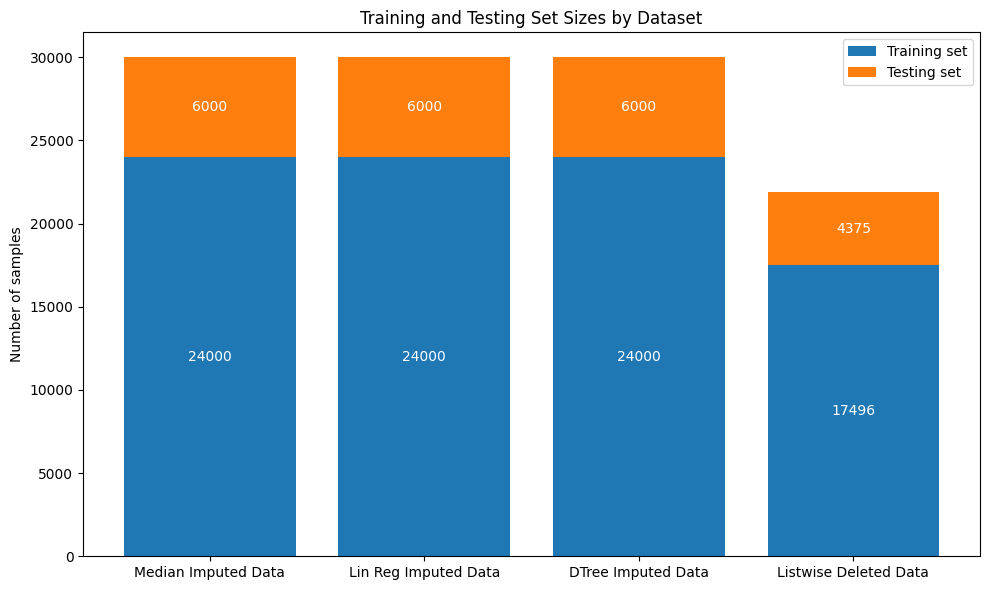

In [56]:
# Dataset names
from operator import index

datasets = list(split_data.keys())

# Extract train and test sizes
train_sizes = [split_data[name][0].shape[0] for name in datasets]
test_sizes = [split_data[name][1].shape[0] for name in datasets]

# Bar positions
index = np.arange(len(datasets))

plt.figure(figsize=(10, 6))

# Plot training bars
train_bars = plt.bar(index, train_sizes, label='Training set', color='tab:blue')

# Plot testing bars on top (stacked)
test_bars = plt.bar(index, test_sizes, bottom=train_sizes, label='Testing set', color='tab:orange')

# Add numbers above training bars
for rect in train_bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

# Add numbers above testing bars
for rect, train_size in zip(test_bars, train_sizes):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, train_size + height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

# Labels and title
plt.ylabel('Number of samples')
plt.title('Training and Testing Set Sizes by Dataset')
plt.xticks(index, ['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'])
plt.legend()

plt.tight_layout()
plt.show()

### Classifier Setup

Standardize the features in all four datasets (A, B, C, D) using StandardScaler.

In [51]:
scalers = {}
scaled_split_data = {}

for name, (X_train, X_test, y_train, y_test) in split_data.items():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scalers[name] = scaler
    scaled_split_data[name] = (X_train_scaled, X_test_scaled, y_train, y_test)

### Model Evaluation

Train logistic regression model on each of the datasets and store the predicted & actual labels into separate variables 

In [58]:
predicted_labels = {}
actual_labels = {}

for ds in ['dfA', 'dfB', 'dfC', 'dfD']:
    X_train, X_test, y_train, y_test = scaled_split_data[ds]
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Use predict_proba to get probabilities of positive class (class 1)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Apply manual thresholding
    y_pred = (y_proba > 0.5).astype(int)

    # Store separately
    predicted_labels[ds] = y_pred
    actual_labels[ds] = y_test

#### Visualize accuracy of each model

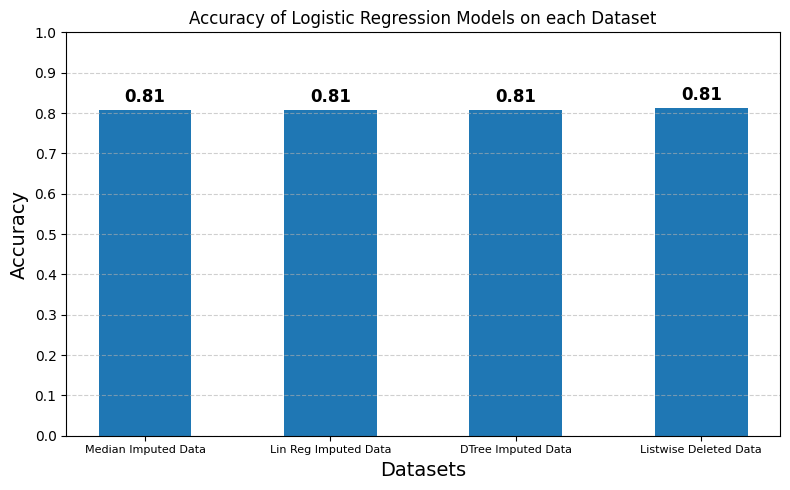

In [65]:
accuracies = []
for ds in datasets:
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    acc = accuracy_score(y_true, y_pred)
    accuracies.append(acc)

x = np.arange(len(datasets))
plt.figure(figsize=(8, 5))
plt.bar(x, accuracies, color='tab:blue', width=0.5)
plt.xticks(x, ['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=8)
plt.yticks(np.linspace(0, 1, 11))
plt.ylim(0, 1)
plt.xlabel('Datasets', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Logistic Regression Models on each Dataset', fontsize=12)

# Add data labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Observations

- All four logistic regression models, regardless of how missing data was handled (**median imputation**, **linear regression imputation**, **decision tree imputation**, or **listwise deletion**), achieved nearly identical accuracy scores of approximately 0.81.

- The consistency in accuracy suggests that the choice of imputation or deletion method for handling missing values had minimal impact on overall predictive performance in this scenario.

#### Plot Classification Metrics

Plot the following classification metrics:
- Precision
- Recall
- F1 Score

for each of the four models for both class 0 & class 1.

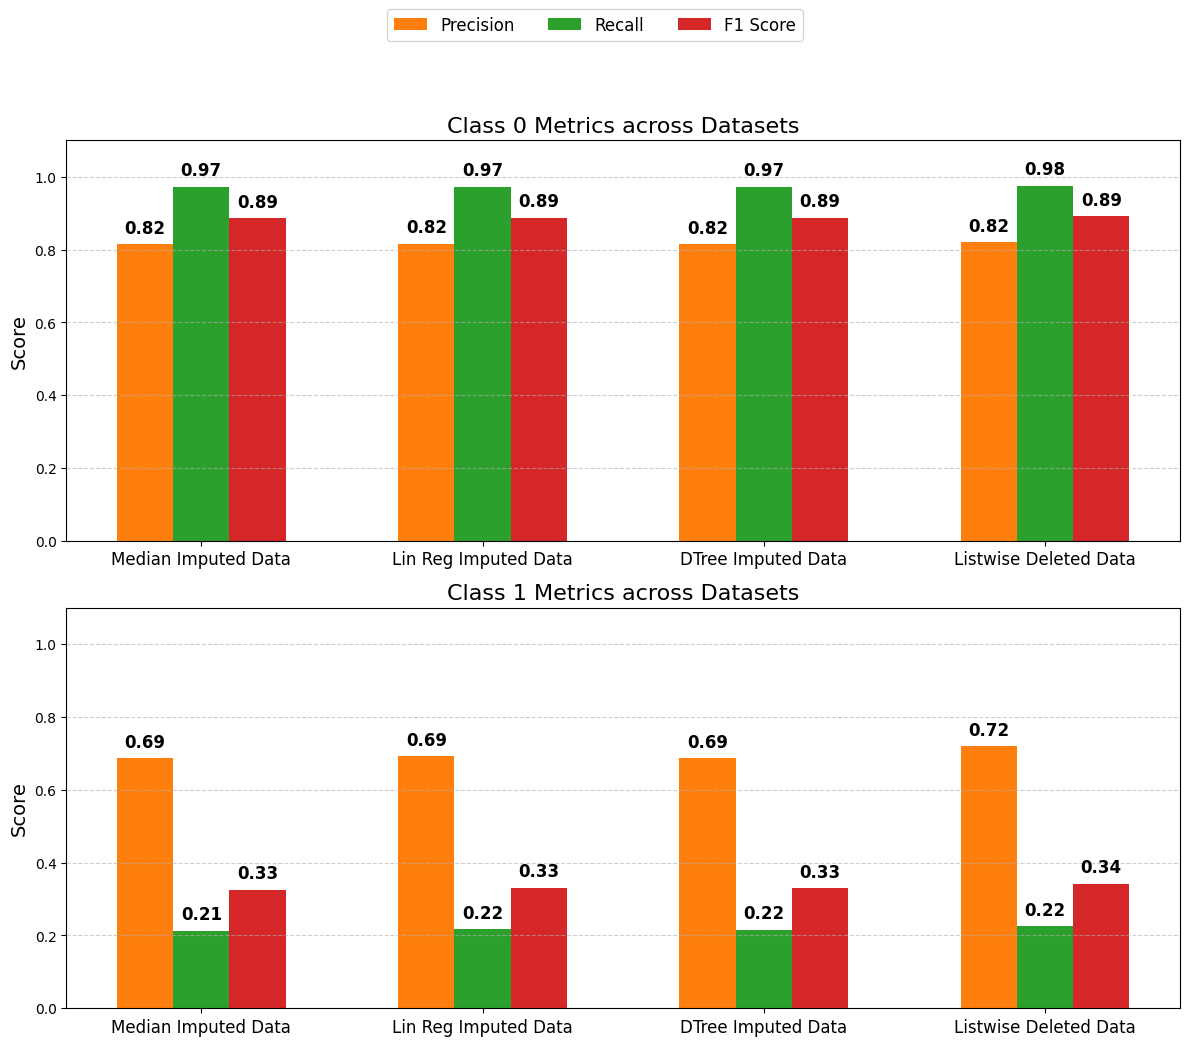

In [70]:
datasets = ['dfA', 'dfB', 'dfC', 'dfD']

# Prepare containers for metrics
precision0, recall0, f1_0 = [], [], []
precision1, recall1, f1_1 = [], [], []

for ds in datasets:
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    
    precision0.append(precision_score(y_true, y_pred, pos_label=0))
    recall0.append(recall_score(y_true, y_pred, pos_label=0))
    f1_0.append(f1_score(y_true, y_pred, pos_label=0))
    
    precision1.append(precision_score(y_true, y_pred, pos_label=1))
    recall1.append(recall_score(y_true, y_pred, pos_label=1))
    f1_1.append(f1_score(y_true, y_pred, pos_label=1))

bar_width = 0.2
x = np.arange(len(datasets))

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

metrics_labels = ['Precision', 'Recall', 'F1 Score']
colors = ['tab:orange', 'tab:green', 'tab:red']

# Plot for class 0
bars_0 = []
for i, metric_vals in enumerate([precision0, recall0, f1_0]):
    bar = axes[0].bar(x + i * bar_width, metric_vals, width=bar_width, color=colors[i], label=metrics_labels[i])
    bars_0.append(bar)
    for j, val in enumerate(metric_vals):
        axes[0].annotate(f'{val:.2f}', (x[j] + i * bar_width, val), xytext=(0, 5), textcoords='offset points',
                         ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[0].set_title('Class 0 Metrics across Datasets', fontsize=16)
axes[0].set_ylabel('Score', fontsize=14)
axes[0].set_xticks(x + bar_width)
axes[0].set_xticklabels(['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=12)  # Vertical xticklabels
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)



# Plot for class 1
bars_1 = []
for i, metric_vals in enumerate([precision1, recall1, f1_1]):
    bar = axes[1].bar(x + i * bar_width, metric_vals, width=bar_width, color=colors[i], label=metrics_labels[i])
    bars_1.append(bar)
    for j, val in enumerate(metric_vals):
        axes[1].annotate(f'{val:.2f}', (x[j] + i * bar_width, val), xytext=(0, 5), textcoords='offset points',
                         ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[1].set_title('Class 1 Metrics across Datasets', fontsize=16)
axes[1].set_ylabel('Score', fontsize=14)
axes[1].set_xticks(x + bar_width)
axes[1].set_xticklabels(['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data'], fontsize=12)
axes[1].set_ylim(0, 1.1)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Common legend for both plots
fig.legend(
    [bars_0[i][0] for i in range(3)],
    ['Precision', 'Recall', 'F1 Score'],
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=3,
    frameon=True
)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space on top for legend
plt.show()

#### Observations (Plot above)
- For class 0 (non-default), all models consistently achieve high precision (~0.82), very high recall (~0.97–0.98), and strong F1 scores (~0.89) regardless of the missing data handling method.

- For class 1 (default), precision is moderate (~0.69–0.72), but recall is very low (~0.21–0.22) across all datasets, resulting in modest F1 scores (~0.33–0.34).

- The results indicate the logistic regression models are accurately identifying non-defaulters but struggle to recall true defaulters, likely due to class imbalance in the dataset.

- There is little variability in performance metrics across different imputation and deletion strategies, suggesting the choice of method does not substantially affect the relative performance for either class.

#### Plot Confusion Matrix
Plot confusion matrices for predictions made by models trained on each of the 4 data sets

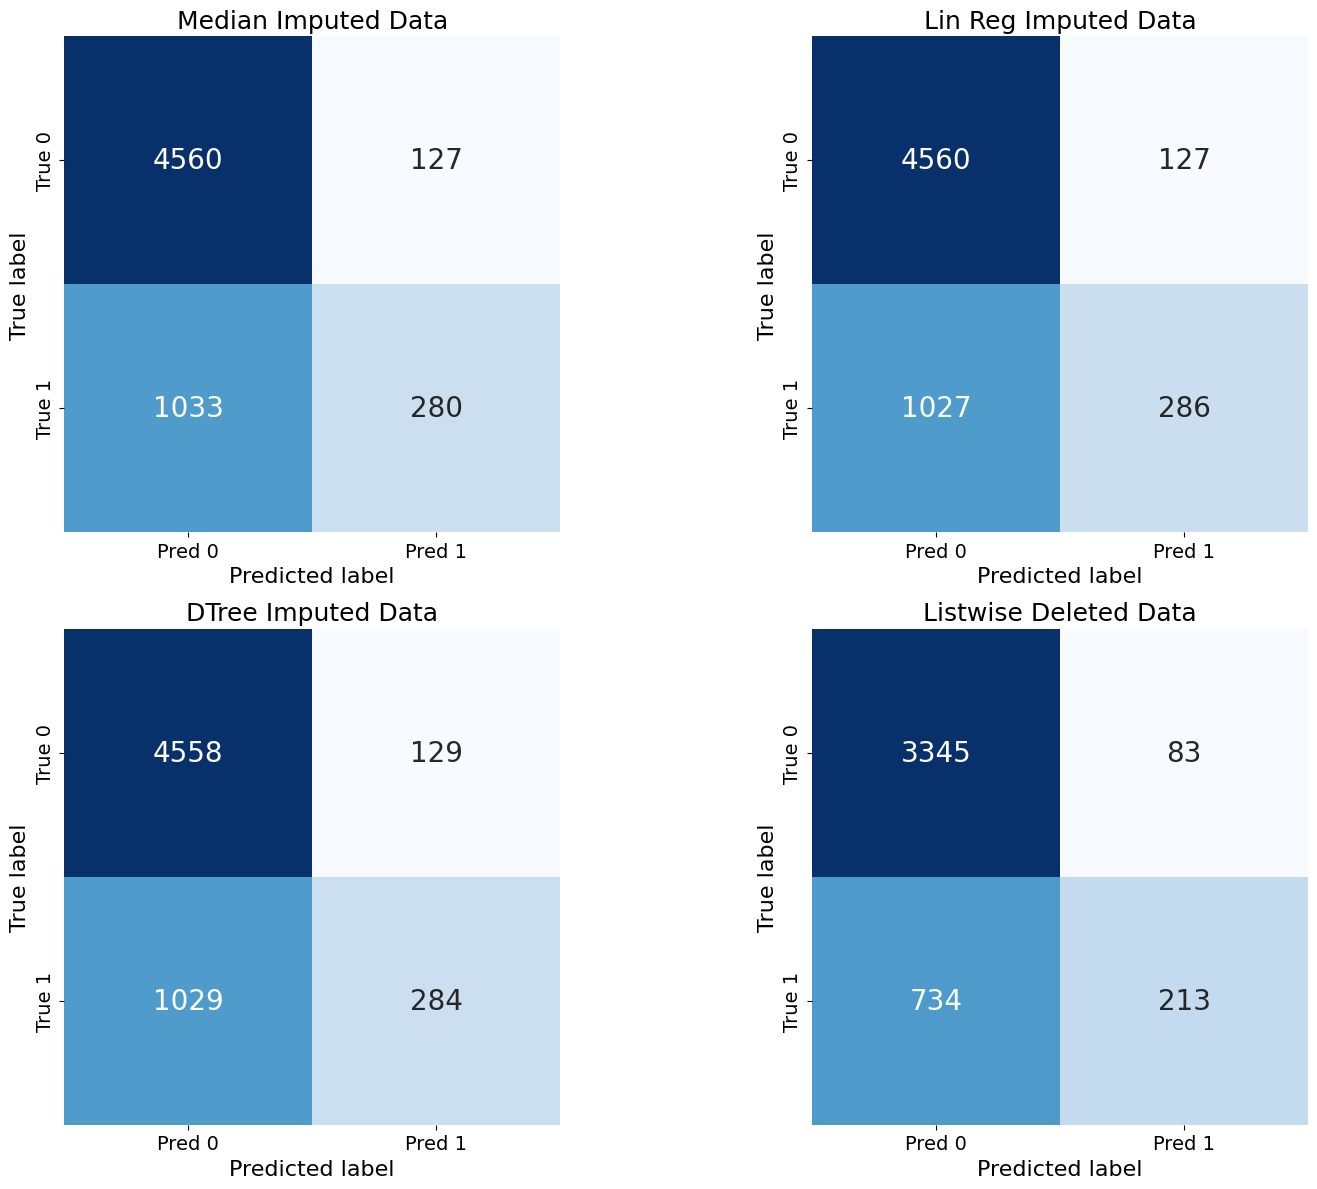

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Balanced square aspect
xticklabels = ['Median Imputed Data','Lin Reg Imputed Data','DTree Imputed Data','Listwise Deleted Data']
for idx, ds in enumerate(datasets):
    y_true = actual_labels[ds]
    y_pred = predicted_labels[ds]
    cm = confusion_matrix(y_true, y_pred)

    # Log scale for heatmap (nonzero only)
    cm_log = np.where(cm > 0, np.log10(cm), 0)
    
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    sns.heatmap(
        cm_log,
        annot=cm,
        fmt='d',
        cmap='Blues',
        ax=ax, 
        cbar=False,
        square=True,
        xticklabels=['Pred 0', 'Pred 1'],
        yticklabels=['True 0', 'True 1'],
        annot_kws={"size": 20}  # Increase heatmap annotation font size
    )
    
    ax.set_title(f'{xticklabels[idx]}', fontsize=18)
    ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_ylabel('True label', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

#### Observations (from plot above)
- The confusion matrices for all imputed datasets (Median, Linear Regression, Decision Tree) are very similar, with most defaults (True label 1) being misclassified as non-default (Pred 0), and non-defaults (True label 0) mostly correctly identified.

- Listwise deleted data shows fewer overall test samples, but exhibits the same pattern: high accuracy for predicting non-defaults and low recall for identifying actual defaults.

- The number of true positives (bottom right, label=1 predicted as 1) is much lower than true negatives (top left), indicating strong class imbalance and model bias toward the majority class.

- Different imputation methods have little effect on the confusion matrix results in this scenario, reflecting robust but imbalanced classifier behavior.

# Part C: Comparative Analysis

### Result comparison

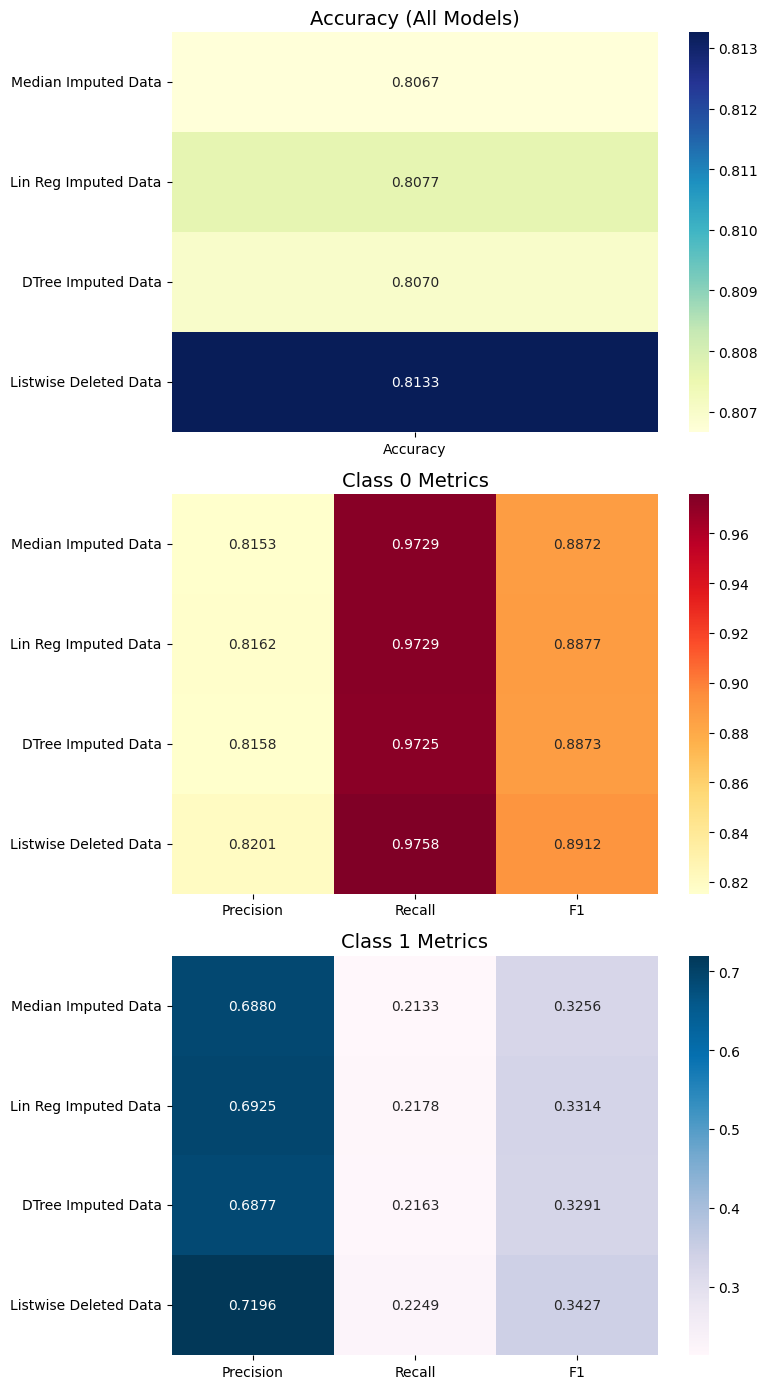

In [79]:
# Compute metrics
accuracies = [accuracy_score(actual_labels[ds], predicted_labels[ds]) for ds in datasets]
precision0 = [precision_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
recall0 = [recall_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
f1_0 = [f1_score(actual_labels[ds], predicted_labels[ds], pos_label=0) for ds in datasets]
precision1 = [precision_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]
recall1 = [recall_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]
f1_1 = [f1_score(actual_labels[ds], predicted_labels[ds], pos_label=1) for ds in datasets]

fig, axes = plt.subplots(3, 1, figsize=(8, 14))  # 3 rows, 1 column

# Accuracy heatmap (shape: (datasets, 1))
acc_matrix = np.array(accuracies).reshape(-1, 1)
sns.heatmap(acc_matrix, annot=True, fmt='.4f', cmap='YlGnBu', ax=axes[0],
            yticklabels=xticklabels, xticklabels=['Accuracy'])
axes[0].set_title('Accuracy (All Models)', fontsize=14)

# Class 0 metrics heatmap (shape: (datasets, 3), then transpose)
class0_matrix = np.array([precision0, recall0, f1_0]).T
sns.heatmap(class0_matrix, annot=True, fmt='.4f', cmap='YlOrRd', ax=axes[1],
            yticklabels=xticklabels, xticklabels=['Precision', 'Recall', 'F1'])
axes[1].set_title('Class 0 Metrics', fontsize=14)

# Class 1 metrics heatmap (shape: (datasets, 3), then transpose)
class1_matrix = np.array([precision1, recall1, f1_1]).T
sns.heatmap(class1_matrix, annot=True, fmt='.4f', cmap='PuBu', ax=axes[2],
            yticklabels=xticklabels, xticklabels=['Precision', 'Recall', 'F1'])
axes[2].set_title('Class 1 Metrics', fontsize=14)

plt.tight_layout()
plt.show()

### Efficacy discussion

#### Part 3.1: Discuss the trade-off between Listwise Deletion (Model D) and Imputation (Models A, B, C).

The trade-off between Listwise Deletion (Model D) and Imputation (Models A, B, C) centers around how missing data is handled and its impact on model performance.

#### Listwise Deletion (Model D)

**Definition:** Listwise deletion removes any row with a missing value from the dataset, ensuring all the data fed to the model is complete without any missing entries.

>Pros:
- Results in consistent and complete data for all models.
- Straightforward and simple to implement.
- Produces unbiased estimates if missingness is completely at random (MCAR).

>Cons:
- Can greatly reduce sample size, especially when missing data is prevalent.
- The reduced dataset may not accurately represent the original population (introduces bias if MCAR is violated).
- Loss of statistical power due to fewer data points.


#### Imputation (Models A, B, C)

**Definition:** Imputation methods fill in missing values using statistics (mean, median, regression, or advanced techniques). This preserves the original dataset size but introduces uncertainty based on imputation quality.

>Pros:
- Maintains the full sample size.
- Avoids the loss of information that occurs with deletion.
- Can improve model stability and generalizability when done properly.

>Cons:
- Introduces assumptions that may not hold, which can bias results.
- Poorly chosen imputation strategies (e.g., using mean imputation for data that isn’t MCAR) may distort underlying distributions or relationships.
- If imputation is not suitable for the missing data mechanism, model performance may still degrade.

#### Why might Model D perform poorly even if imputed models perform worse?

- `Dramatic loss in sample size`: If missingness is not rare, listwise deletion can leave you with a very small and less representative dataset, causing high variance, overfitting, and poor generalization.

- `Bias and unreliability`: If missingness is not MCAR (e.g., it is related to feature values or the outcome), listwise deletion produces biased results because the remaining data does not reflect the full population.

- `Absence of vital relationships`: Removing many rows may eliminate important variations in the data, further degrading the model’s ability to learn true patterns.

#### Why can imputation sometimes still result in lower performance?

- `Imputed values may not be accurate`: Especially for non-random missingness, imputation can introduce noise or degrade correlation structures.

- `Simplistic imputations (like mean imputation) can reduce variance` and mask important data characteristics, hurting model learning.

- Imputation relies on the assumption that observed data can predict missing values well. If this is not true, the filled-in data will mislead the model.

#### Part 3.2: Which regression method (Linear vs. Non-Linear) performed better and why?

- `Performance`: The Linear Regression imputed dataset yields **slightly better** or comparable accuracy and class-wise metrics compared to the Decision Tree imputed dataset.

- `Reasoning`: Linear regression assumes a linear relationship between the imputed feature (likely PAY_0) and predictors, fitting continuous, additive effects smoothly. The Decision Tree model captures nonlinear interactions but **may overfit** or create piecewise constant imputation that is less smooth and harder for logistic regression to leverage.

- `Relationship Assumption`: The results suggest the relationship between the missing feature and predictors may be primarily linear or approximated well by a linear model.

- `Effectiveness`: Linear regression based imputation preserves useful linear correlations that directly benefit downstream logistic regression classification, giving marginally better performance.

Hence, `linear regression imputation performs better` likely because it better matches the underlying linear dependencies in the data, while decision tree regression’s flexibility does not translate to improved imputations or classification gain in this context.

#### Part 3.3: Recommendation

`Impute` missing values `using linear regression` or `median imputation` rather than decision tree imputation or listwise deletion.

Justification

1. Classification Performance

- Accuracy and class-wise `metrics` (precision, recall, F1) are `nearly identical` across the first three imputation strategies (median, linear regression, decision tree), though listwise deletion shows very slightly higher class 1 metrics.

- `Linear regression imputation` achieves `accuracy (0.8077)` that is marginally better or at par with median and decision tree imputation and only slightly less than listwise deletion (0.8133).

- Class 1 (minority class) metrics—all models show low recall and F1 score (recall ≈ 0.21–0.22, F1 ≈ 0.32–0.34), reflecting `inherent class imbalance` but no method drastically improves or degrades recall for defaults.

- `Listwise deletion` gains a `tiny improvement` in F1 and recall for class 1, `but` at the significant cost of `reducing the dataset size` (less statistical power, `potential bias` if MAR is not MCAR).

2. Conceptual Implications

- `Median imputation` is `robust`, simple, and not influenced by outliers, but `ignores feature relationships` and patterns.

- `Linear regression imputation` leverages relationships between variables, leading to more plausible and informed imputation values where linear associations exist—the `slight edge seen in metrics` reflects this benefit and the appropriateness of the linear assumption for these features.

- `Decision tree imputation` can model complex, non-linear relations but is susceptible to `overfitting` and instability with limited data or weak signals, which explains its comparable-but-not-superior results in this MAR scenario.

- `Listwise deletion` can introduce `bias` when data is MAR (not MCAR) and reduces effective sample size, making the `model less generalizable` and possibly discarding useful information unnecessarily.

#### Final Guidance
- Preferred choice: `Linear regression imputation is best` in this experiment, offering a balance between plausible imputation, relationship preservation, and classification performance. Use this especially if there is reason or evidence that the feature relationships are predominantly linear.

- `Median imputation` is a `strong, nearly-equivalent fallback` when `simplicity` and `speed` are valued, or when relationships between features are weak.

- `Avoid listwise deletion` unless missingness is truly MCAR and the proportion of missing data is negligible.

- `Reserve decision tree imputation` for when `exploratory analysis` or theory indicates strong, non-linear dependencies between predictors and missing features.

This approach ensures your model benefits from preserved data relationships, maintains sample size, and maximizes learnability without introducing extra complexity or unnecessary data loss.